In [ ]:
1.Load the dataset into a Pandas dataframe.
2.Split the dataset into features and target variables.
3.Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.
4.Implement PCA on the preprocessed dataset using the scikit-learn library.
5.Determine the optimal number of principal components to retain based on the explained variance ratio.
6.Visualise the results of PCA using a scatter plot.
7.Perform clustering on the PCA-transformed data using K-Means clustering algorithm.
8.Interpret the results of PCA and clustering analysis.

In [9]:
# Import the required libraries:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [10]:
#1: Load the Wine dataset:
wine_data = pd.read_csv('wine.csv')
df = pd.DataFrame(wine_data)

In [11]:
df.head(5)

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [29]:
#2.Split the dataset into features and target variables.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [30]:
df['Wine'].unique()

array([1, 2, 3])

In [31]:
X=df.drop('Wine',axis=1)
y=df['Wine']

In [34]:
X

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [35]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Wine, Length: 178, dtype: int64

In [36]:
#3.Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary
df.isnull().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

In [ ]:
Observation:-Dataset contains no null values.

In [41]:
#train,test,split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [46]:
#standard scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X_train)

In [43]:
X_scaled

array([[ 1.66529275, -0.60840587,  1.21896194, ..., -1.65632857,
        -0.87940904, -0.24860607],
       [-0.54952506,  2.7515415 ,  1.00331502, ..., -0.58463272,
        -1.25462095, -0.72992237],
       [-0.74531007, -1.14354109, -0.93750727, ...,  0.35845962,
         0.2462267 , -0.24860607],
       ...,
       [ 1.714239  , -0.44172441,  0.06884503, ...,  1.04434496,
         0.56585166,  2.69572196],
       [-0.35374006, -0.7399965 , -0.36244882, ...,  0.01551695,
        -0.74044166, -0.79631083],
       [-0.78201975,  0.06709269,  0.35637426, ..., -0.67036839,
         1.09392769, -0.98551793]])

In [55]:
#4.Implement PCA on the preprocessed dataset using the scikit-learn library.
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)


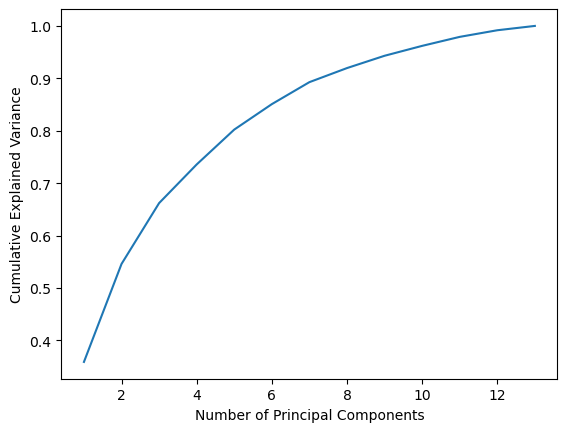

In [56]:
#5.Determine the optimal number of principal components to retain based on the explained variance ratio.
import numpy as np
import matplotlib.pyplot as plt

explained_var = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(explained_var) + 1), explained_var)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

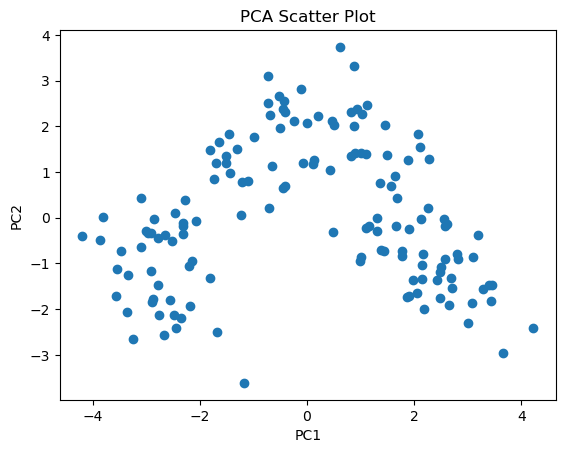

In [67]:
#6.Visualise the results of PCA using a scatter plot.
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scatter Plot')
plt.show()

In [61]:
#7.Perform clustering on the PCA-transformed data using K-Means clustering algorithm.

In [65]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X_pca)
clusters

array([0, 0, 2, 0, 1, 2, 2, 2, 0, 1, 2, 2, 0, 1, 2, 1, 1, 0, 0, 2, 1, 1,
       2, 1, 0, 2, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 2, 1, 0, 2, 1, 0, 2, 2,
       1, 2, 1, 1, 2, 1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0,
       1, 1, 2, 0, 0, 2, 0, 2, 2, 2, 1, 1, 0, 1, 0, 1, 1, 2, 2, 1, 1, 1,
       2, 1, 2, 0, 2, 2, 0, 0, 0, 2, 1, 1, 2, 0, 0, 1, 2, 0, 0, 0, 0, 2,
       1, 2, 1, 0, 1, 1, 2, 1, 1, 0, 2, 1, 0, 0, 1, 1, 0, 0, 0, 2, 2, 2,
       2, 2, 1, 0, 1, 2, 2, 1, 2, 2], dtype=int32)

In [ ]:
#8.Interpret the results of PCA and clustering analysis:
PCA helps in dimensionality reduction by capturing the most important patterns in the data. The scatter plot shows the 
data points projected onto the first two principal components, allowing you to visualize the clusters. The clustering 
analysis assigns each data point to a cluster based on its PCA representation. we can interpret the results by analyzing
the cluster assignments and exploring the characteristics of each cluster in the original feature space.